# TP2 : Méthodes numériques à un pas

On commence toujours par charger les librairies `numpy` et `matplotlib.pyplot` 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/jules/.venv/main/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Voici quelques commandes utiles pour afficher les graphes :

| | |
|-|-|
|`plt.figure(figsize = (10, 10))` | Crée une nouvelle fenêtre de taille [10,10] |
| `plt.plot(x,y)` | Trace les points $(x_i,y_i)$ |
| `plt.xlabel('Nom abscisse')` | Nomme l'axe des abscisses  |
| `plt.ylabel('Nom ordonnée')` | Nomme l'axe des ordonnées  |
| `plt.title('Titre figure')` |  Donne un titre à la figure|
|`plt.legend()`| Permet d'afficher les légendes associées aux courbes |
| `plt.loglog()`| trace la courbe  à l'échelle logarithmique| 



Autres commandes utiles pour le TP :

| | |
|-|-|
| `np.array((n, p))` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ |
| `np.ones((2,3))`, ou `np.zeros((2,3))` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ remplie de 1, ou 0 |
| `A[2,:]` (ou `A[:,2]` ) | Renvoie la 3e ligne (ou colonne) de la matrice `A` (comme vecteur 1D) |
| `np.abs(x)` | Applique la valeur absolue à tous les coefficients du vecteur `x` |
| `max(abs(x))` |  calcule $\max_{i=1,...,N} \lvert x_i \rvert$ |


## I. Ordre d’une méthode
Rappel sur le calcul de l’ordre d’une méthode numérique pour la résolution approchée d'EDOs.
 En utilisant les notations usuelles, l’erreur d’une méthode à un pas est définie comme
 
$$
	E_h:= \max_{n = 0, \dots, N} \left| y(t_n) - y_n \right|
$$

où $t_n = t_0 + n_h$, $y$ est la solution exacte de l'EDO et $y_n$ la solution approchée obtenue par une méthode
numérique. L’ordre du schéma est la plus grande valeur possible de $p > 0$ telle que

$$
	E_h \le C h^p
$$

pour $h$ petit et $C$ constante qui ne dépend pas de $h$. Si l'on prend le logarithme de l'inégalité précédente on obtient 

$$
	\log E_h  \le C' + p \log h.
$$

Pour visualiser l'ordre d'une méthode on peut procéder de la manière suivante : pour différentes valeurs de $h$ on calcule l'erreur $E_h$ et on crée un graphe $(h, E_h)$  en échelle logarithmique. Les points devraient être au dessous d'une droite dont l'inclinaison est l'ordre $p$ de la méthode.

## I.A. Méthode d'Euler 

On souhaite coder le schéma d'Euler explicite pour les problèmes de Cauchy

\begin{equation}
	\begin{cases}
		 y'(t)= f(t,y(t)), \quad t \in (t_0,t_f]\\
		 y(t_0)=y_0.
	\end{cases}
\tag{EDO} 
\end{equation}

On rappelle qu'il s'agit d'une méthode à un pas qui s'écrit sous la forme

\begin{equation}
	\begin{cases}
	t_{n+1} = t_n + h_n\\
	y_{n+1} = y_n+ h_n  f(t_n,y_n).
	\end{cases}
\tag{EE}
\end{equation}

où  $[t_0, t_1\cdots, t_N]$ est une subdivision de $[t_0, t_f]$ et $h_n = t_{n+1} -t_n$.

**I.A.1)** Dans un script Python, écrivez une fonction de la forme `t_e, y_e = euler(y0,t0,tf,N,f)` qui calcule par la méthode d'Euler explicite (EE) sur un maillage de $N$ intervalles uniformes la solution approch\'ee de (EDO),  et retourne ainsi le vecteur des valeurs `t_e= [t_0, t_1, ..., t_N]` et  le tableau des solutions approchées `y_e = [y_0,y_1, ..., y_N]`.

On peut créer des maillages uniformes avec la commande `np.linspace(t0,tf,N+1)` et pour implémenter le schéma, on pourra utiliser, par exemple, une boucle `for n in range(N):`


In [2]:
def euler(y0, t0, tf, N, f):
    t_e = np.linspace(t0,tf,N)
    y_e = np.zeros_like(t_e)
    y_e[0] = y0
    
    h = (tf -t0)/N
    for n in range(1,N):
        y_e[n] = y_e[n-1] + h * f(t_e[n-1],y_e[n-1])

    return t_e , y_e

#### Application au modèle logistique

**I.A.2)** Appliquez la méthode d'Euler explicite au modèle logistique

\begin{equation}
\frac{dy}{dt}(t) = r \; y(t) \left( 1-\frac{y(t)}{K}\right).
\tag{Logistique}
\end{equation}

Commencez par définir une fonction `f(t,y)` décrivant le champs de vitesse.
Puis fixez les paramètres (donnèe initiale, intervalle de temps, etc.) : `y0 = 0.1, t0 = 0, tf = 10, N = 10, r= 1, K=1`


In [3]:
def f(t,y):
    return r * y * (1 - y/K)

**I.A.3)** Définissez une fonction `solex(t,y0)` qui calcule la solution exacte donnée par 

$$ y(t)  = \frac{y_0 K}{y_0 - e^{-rt}(y_0-K)}, $$ 
        
pour `K=1` et `r=1`. Puis comparez la à la solution approchée obtenue précédement. 

In [7]:
def solex(t,y0):
    return (y0 * K) / (y0 - np.exp(-r*t) * (y0 - K))

Text(0.5, 1.0, 'Modèle logistique : solutions approchée et exacte')

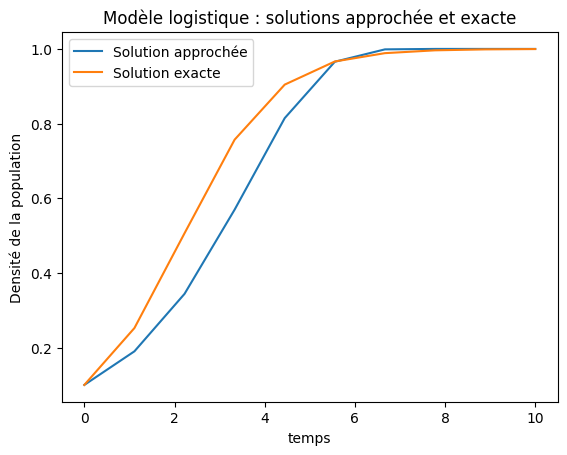

In [8]:
y0 = 0.1
t0 = 0
tf = 10
N = 10
r= 1
K=1

t_e,y_app = euler(y0, t0, tf, N, f)
y_ex = solex(t_e,y0)

plt.figure()

plt.plot(t_e,y_app,label="Solution approchée")
plt.plot(t_e,y_ex,label="Solution exacte")




plt.legend()
plt.xlabel("temps")
plt.ylabel("Densité de la population")
plt.title("Modèle logistique : solutions approchée et exacte")

**I.A.4)**  On souhaite maintenant calculer l'erreur de la méthode et en déduire l'ordre de la méthode. 

*(a)* Calculez pour $h = 1/2^k$ avec $k =1,2, ...8$, l'erreur 

$$  E_h= \max_{n=0,..,N}\left| y(t_n) - y_n \right|,$$

à l'aide de la commande `max(abs())`.
Affichez  les valeurs de $k,h$ et l'erreur $E_h$ avec `print()`. On pourrait mémoriser $[k,h,E_h]$ dans une matrice $8 \times 3$.

In [31]:
error = np.zeros((8,3))

for n in range(8):
    N = np.power(2,n+3)
    
    t_e,y_app = euler(y0, t0, tf, N, f)
    y_ex = solex(t_e,y0)
    
    h = (tf-t0)/N
    err = np.max(np.abs(y_app - y_ex))
    error[n,:] = n+1, h, err

print("Analyse de l'erreur pour Euler")       
print(error)   

Analyse de l'erreur pour Euler
[[1.00000000e+00 1.25000000e+00 2.37562343e-01]
 [2.00000000e+00 6.25000000e-01 1.20446735e-01]
 [3.00000000e+00 3.12500000e-01 5.92636948e-02]
 [4.00000000e+00 1.56250000e-01 2.92212123e-02]
 [5.00000000e+00 7.81250000e-02 1.45289080e-02]
 [6.00000000e+00 3.90625000e-02 7.24088705e-03]
 [7.00000000e+00 1.95312500e-02 3.61362373e-03]
 [8.00000000e+00 9.76562500e-03 1.80504238e-03]]


*(b)* Tracez,  à l'échelle logarithmique en utilisant `plt.loglog(...)`, l'erreur en fonction de $h$. 
Déduisez en que la méthode est d'ordre $1$ (en traçant $\log E_h$ en fonction de $\log h$).

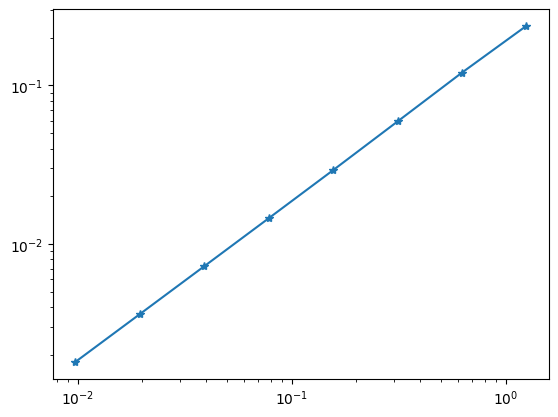

In [32]:
plt.loglog(error[:,1],error[:,2],"-*")

Pour connaître le coefficient directeur d'une approximation linéaire d'un nuage de points $(x_i,y_i)$, on se sert de la librairie `scipy.stats` et de la fonction `linregress(X,Y)`.

In [33]:
import scipy.stats as sc 

lgt = np.log(error[:,1])
lge = np.log(error[:,2])

droite = sc.linregress(lgt,lge)
coefficient_directeur =droite[0]  # droite.slope
print("L'ordre de la méthode est : ", coefficient_directeur)

L'ordre de la méthode est :  1.008116117420063


### I.B. Méthode de Heun

Dans la suite, on va reprendre l'exemple du modèle logistique en utilisant une méthode d'ordre supérieur. 

#### Ordre de la méthode

La méthode de Heun consiste à, tout d'abord, estimer la solution à l'instant $t_{n+1}$ en utilisant une étape de la méthode d'Euler explicite, puis à approcher l'aire de f(t,y) entre $t_n$ et $t_{n+1}$ par la moyenne entre $h_nf(t_{n}, y_{n})$ et $h_nf(t_{n+1}, y_{n+1})$. Cette estimation est alors utilisée pour calculer $y_{n+1}$. Elle peut s'écrire de la forme suivante
    
\begin{equation}
\begin{cases}
p_1 = f(t_n,y_n)\\
p_2  = f(t_n+h_n,y_n + h_n p_1)\\
y_{n+1}   = y_n+ \frac{h_n}{2}\left(p_1 + p_2\right) 
\end{cases}
\tag{Heun}
\end{equation}

**I.B.1)** Écrivez une fonction Python de la forme `t_h, y_h = heun(y0,t0,tf,N,f)` qui calcule par la méthode de Heun (H) sur un maillage de $N$ intervalles uniformes la solution approchée de (EDO),  et retourne ainsi le vecteur des valeurs `t_h= [t_0, t_1, ..., t_N]` et  le tableau des solutions approchées `y_h = [y_0,y_1, ..., y_N]`.

In [34]:
def heun(y0,t0,tf,N,f):
    t_h = np.linspace(t0,tf,N)
    y_h = np.zeros_like(t_h)
    y_h[0] = y0
    
    h = (tf -t0)/N
    for n in range(1,N):
        p1 = f(t_h[n-1],y_h[n-1])
        p2 = f(t_h[n], y_h[n-1] + h * p1)
        y_h[n] = y_h[n-1] + h * 0.5 * (p1 + p2)
         
    return t_h , y_h

#### Application au modèle logistique

Dans cette partie on va utiliser la méthode précédement introduitea sur l'équation logistique (E_logistique) et en déduire son ordre de convergence. En particulier, on va vérifier que la méthodes de Heun est bien d'ordres 2.

**I.B.1)** En reprenant les valeurs des paramétres utilisées pour la méthode d'Euler `y0 = 0.1, t0 = 0, tf = 10, N = 10, r= 1, K=1`, écrivez un script Python qui trace sur un même graphique la solution exacte ainsi que les solutions approchées trouvées avec les méthodes d'Euler et la méthode de Heun.

Text(0.5, 1.0, 'Solution apparochée du modèle logistique')

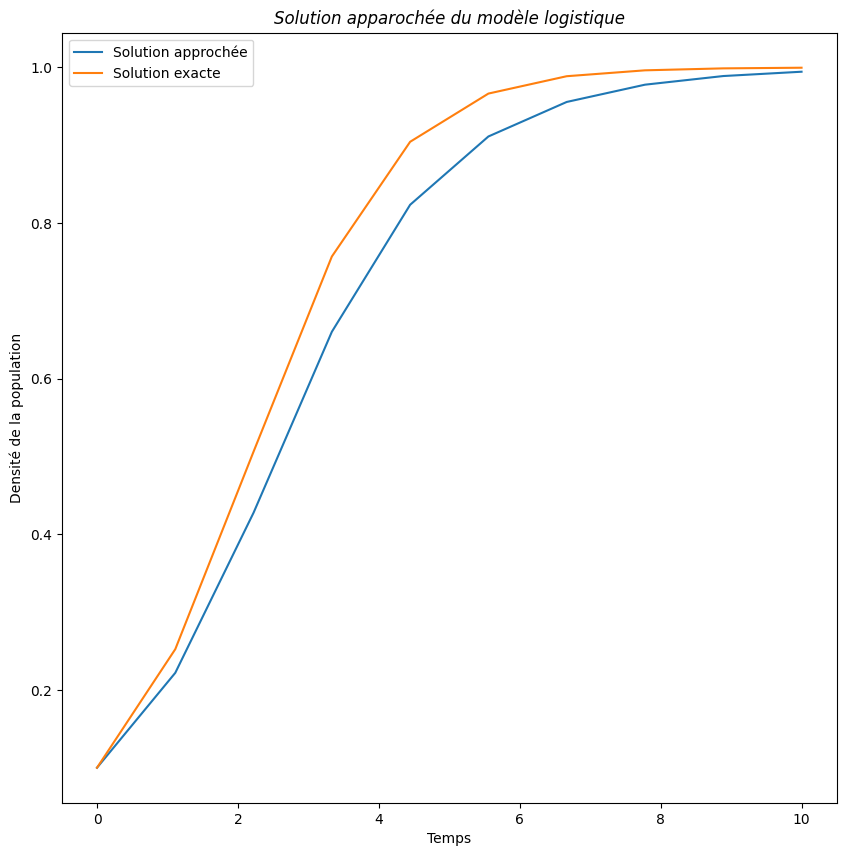

In [35]:
y0 = 0.1
t0 = 0
tf = 10
N = 10
r= 1
K=1


t_e,y_app = heun(y0, t0, tf, N, f)
y_ex = solex(t_e,y0)

plt.figure(figsize = (10, 10))

plt.plot(t_e,y_app,label="Solution approchée")
plt.plot(t_e,y_ex,label="Solution exacte")

plt.legend()
plt.xlabel('Temps')
plt.ylabel('Densité de la population')
plt.title('Solution apparochée du modèle logistique', fontstyle = 'italic')

**I.B.2)** Calculez pour $h = 1/2^k$ avec $k =1,2, ...8$, l'erreur 

$$  E_h= \max_{n=0,..,N}\left| y(t_n) - y_n \right|,$$

à l'aide de la commande `max(abs())`.
Affichez les valeurs de $k,h$ et l'erreur $E_h$ avec `print()` pour ces différentes méthodes. On pourra mémoriser $[k,h,E_h]$ dans une matrice $8 \times 3$.

In [36]:
error_h = np.zeros((8,3))

for n in range(8):
    N = np.power(2,n+3)
    
    t_e,y_app = heun(y0, t0, tf, N, f)
    y_ex = solex(t_e,y0)
    
    h = (tf-t0)/N
    err_h = np.max(np.abs(y_app - y_ex))
    
    error_h[n,:] = n+1, h, err_h


print("Analyse de l'erreur pour Heun", error_h)       



Analyse de l'erreur pour Heun [[1.00000000e+00 1.25000000e+00 1.21652797e-01]
 [2.00000000e+00 6.25000000e-01 5.41715247e-02]
 [3.00000000e+00 3.12500000e-01 2.41789667e-02]
 [4.00000000e+00 1.56250000e-01 1.11113381e-02]
 [5.00000000e+00 7.81250000e-02 5.29906244e-03]
 [6.00000000e+00 3.90625000e-02 2.58030123e-03]
 [7.00000000e+00 1.95312500e-02 1.27257549e-03]
 [8.00000000e+00 9.76562500e-03 6.31829621e-04]]


**I.B.3)** Tracez,  à l'échelle logarithmique en utilisant `plt.loglog(...)`, les erreurs en fonction de $h$. 
Déduisez en l'ordre de la méthode.

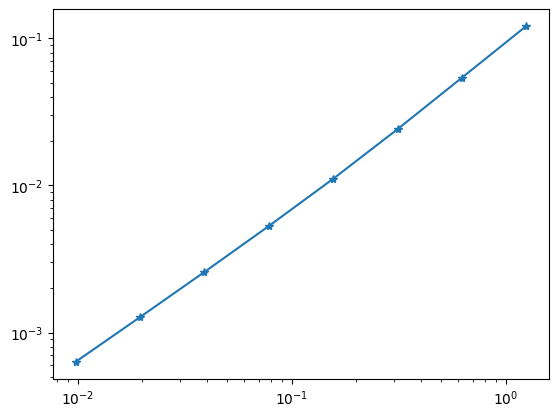

In [37]:
plt.loglog(error_h[:,1],error_h[:,2],"-*")


In [38]:
lgt = np.log(error_h[:,1])
lge = np.log(error_h[:,2])

droite = sc.linregress(lgt,lge)
coefficient_directeur =droite[0]  # droite.slope
print("L'ordre de la méthode est : ", coefficient_directeur)

L'ordre de la méthode est :  1.0825515749408416


#### Un exemple avec manque de régularité

Dans cette partie, on va regarder l'ordre de la méthode pour lorsque le second membre $f$ n'est pas $\mathcal{C}^2$.

**I.B.4)** Appliquez la méthode de Heun pour résoudre l'équation différentielle suivante

\begin{equation}
\tag{1}
y'(t) = -|y(t)|y(t)^{-2/3}
\end{equation}

avec $y(0) = 1$. 

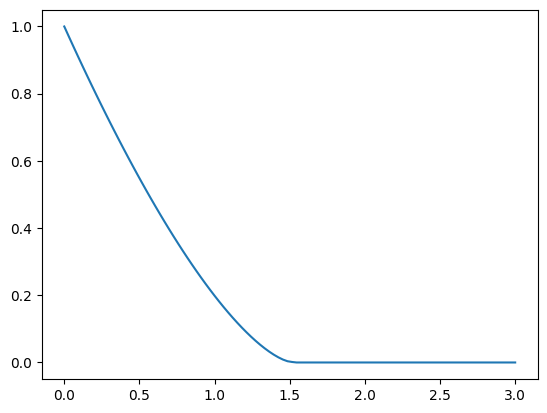

In [49]:
def f(t,y):
    if y <= 0 :
        return 0
    return - np.sign(y) * (y ** (1/3))

y0 = 1
t0 = 0
tf = 3
N = 100

t,y = heun(y0,t0,tf,N,f)
plt.plot(t,y)




**I.B.5)** La solution de (1) est 

$$
y(t) = \max\left(1 -\frac{2}{3}t, 0\right)^{3/2}
$$

À l'aide de cette fonction, calculez l'erreur de la méthode. Que remarquez vous ?  
*Astuce :* On peut remarquer que $\max(x,0) = \frac{|x| + x}{2}$.

In [61]:
def sol(t):
    return np.clip( 1 - 2*t/3,0,None)**(3/2)

error_h = np.zeros((8,3))

for n in range(8):
    N = np.power(2,n+1)
    t,y = heun(y0,t0,tf,N,f)
    y_ex = sol(t)
    
    h = (tf-t0)/N
    
    err_h = np.max(np.abs(y - y_ex))
    
    error_h[n,:] = n+1, h, err_h


print("Analyse de l'erreur pour Heun", error_h)   





Analyse de l'erreur pour Heun [[1.00000000e+00 1.50000000e+00 2.50000000e-01]
 [2.00000000e+00 7.50000000e-01 1.96314713e-01]
 [3.00000000e+00 3.75000000e-01 8.78684968e-02]
 [4.00000000e+00 1.87500000e-01 3.94594909e-02]
 [5.00000000e+00 9.37500000e-02 1.89090257e-02]
 [6.00000000e+00 4.68750000e-02 9.23262914e-03]
 [7.00000000e+00 2.34375000e-02 4.56371238e-03]
 [8.00000000e+00 1.17187500e-02 2.26849152e-03]]


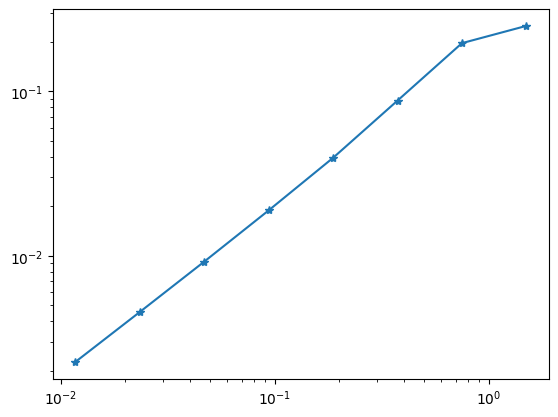

In [62]:
plt.loglog(error_h[:,1],error_h[:,2],"-*")


## II. Résolution de systèmes d’EDOs

On souhaite utiliser les mèthodes prédédentes pour résoudre des système d'EDO sous la forme
\begin{equation}
   Y(t) = F(t,Y(t)), \qquad t \in (t_0, t_f],   
\tag{Syst}
\end{equation}

où $Y(t) = (y_1(t), y_2(t))^T $ et $F(t,Y(t)) = (f_1(t,Y(t)), f_2(t,Y(t)) )^T$, avec $Y(t_0) = (y_{1,0}, y_{2,0})^T$.

### II.A. Méthode d'Euler explicite

Le schéma d'Euler associé à ce système s'écrit de la façon suivante :

\begin{equation}
  \begin{cases}
   t_{n+1} = t_n +h_n,\\
   y_{1,n+1}  = y_{1,n} + h_n f_1(t_n,y_{1,n},y_{2,n}),\\
   y_{2,n+1}  = y_{2,n} + h_n f_2(t_n,y_{1,n},y_{2,n})
  \end{cases}, \qquad t \in (t_0, t_f],   
\tag{Syst}
\end{equation}

**II.A.1)** Dans un script Python, modifiez la fonction `euler` pour calculer par la méthode d'Euler explicite (E_Syst) sur un maillage de $N$ intervalles uniformes la solution approchée de (Syst),  et retourne ainsi le vecteur des valeurs `t_e= [t0, t1, ..., tN]` et  le tableau des solutions approchées `y1_e = [y1_0,y1_1, ..., y1_N]` et `y2_e = [y2_0,y2_1, ..., y2_N]`.

In [ ]:
def euler_syst(y10, y20, t0, tf, N, fct):
    h = (tf-t0)/N

    t_e = 
    y1_e = 
    y2_e = 


    
    
    for n in range(N):
        
        
    
    return (t_e, y1_e, y2_e)

#### Application au modèle de Lotka-Volterra

Le système de Lokta-Volterra , ou modèle proie-prédateur, s'écrit de la forme 

\begin{equation}
	    \begin{cases}
	        y_1'(t) = y_1(t) \left( 1 - y_2(t) \right) \\
	        y_2'(t) = y_2(t) \left( y_1(t) - 1 \right)
	    \end{cases}, \; \;\; t\in(t_0,t_f]
\tag{L-V}
\end{equation}
    
avec  $y_1(t_0) = y_{1,0}$ et $y_2(t_0) = y_{2,0}$.

**II.A.2)** Fixez d'abord les paramètres (données initiales, intervalle de temps, etc.) `y10 = 3, y20 = 0.5, t0 = 0, tf = 50, N=1000 ` puis définisez une fonction `F(t,y1,y2)` qui décrit le champs de vitesse du système.

In [ ]:
y10 = 
y20 = 
t0 = 
tf =
N = 

def F(t,y1,y2):
    return 

**II.A.3)** Utilisez la fonction `euler_syst` pour calculer une solution approchée du système Lokta-Voterra. En particulier, tracez le graphe approché de $(t, y_1(t))$ (population totale des proies) et $(t, y_2(t))$ (population totale des prédateurs).

In [ ]:




plt.figure()



plt.legend()
plt.title("évolution de la population des proies et des prédateurs")

**II.A.4)** Tracez le diagramme de phase du système, c'est à dire, le graphe approchée de (y1(t), y2(t)).

In [ ]:
plt.figure()



plt.xlabel('proie')
plt.ylabel('predateur')
plt.title("Diagramme de phase")

**II.A.5)** On a vu (TP1) que la fonction

$$
  C(y_1,y_2) := - \ln x + x - \ln y + y 
  $$
 est constante le long des solutions du système (L-V). Cette propriété, est-elle vérifiée aussi par la solution numérique de la méthode d'Euler (au moins approximativement) ? Tracez le graphe approché de $(t, C(y_1(t),y_2(t)))$.

**Remarque :**  On peut remarquer que l'energie du système n'est pas du tout conservée par
    la méthode numérique. Les erreur introduites par la méthode sont trops 
    grandes. Vous pouvez comprendre l'interèt de construire des méthodes d'ordre
    supèrieure pour essayer de contourner ce problème.

**II.A.6)** Refaites les simulations avec $N = 10000$, $N=100000$, $N=1000000$. Que constatez vous ?

## II.B. Méthode de Heun pour les systèmes

On va maintenant utiliser la méthode de Heun pour résoudre des système d'EDO sous la forme
\begin{equation}
   Y(t) = F(t,Y(t)), \qquad t \in (t_0, t_f],   
\tag{Syst}
\end{equation}

où $Y(t) = (y_1(t), y_2(t))^T $ et $F(t,Y(t)) = (f_1(t,Y(t)), f_2(t,Y(t)) )^T$, avec $Y(t_0) = (y_{1,0}, y_{2,0})^T$.

La méthode de Heun pour (Syst) s'écrit de la façon suivante

\begin{equation}
  \begin{cases}
   p_{1,1}  = f_1(t_n, y_{1,n},y_{2,n}) \\
   p_{1,2}  = f_2( t_n, y_{1,n},y_{2,n}) \\
   p_{2,1} = f_1(t_n +h_n, y_{1,n} + h_n p_{1,1} ,y_{2,n}+ h_n p_{1,2})\\
   p_{2,2} = f_2(t_n+h_n, y_{1,n} + h_n p_{1,1} ,y_{2,n}+ h_n p_{1,2})\\
   y_{1,n+1}  = y_{1,n} + h_n (p_{2,1} + p_{1,1}),\\
   y_{2,n+1}  = y_{2,n} + h_n (p_{2,2} + p_{1,2})
  \end{cases}  
\tag{Syst}
\end{equation}

**II.B.1)** Écrivez une fonction Python de la forme ` heun_syst(y10,y20,t0,tf,N,f)` qui calcule par la méthode de Heun (H_Syst) sur un maillage de $N$ intervalles uniformes la solution approchée de (Syst),  et retourne ainsi le vecteur des valeurs `t= [t_0, t_1,..., t_N]` et  le tableau des solutions approchées `y1= [y1_0,y1_1,..., y1_N]` et `y2= [y2_0,y2_1,..., y2_N]`.

In [ ]:
def heun_syst(y10, y20, t0, tf, N, fct):
    h = (tf-t0)/N

    t = 
    y1 = 
    y2 = 

   
    
    for n in range(N):
        
        
    
    return (t, y1, y2)

#### Application au système Lokta-Volterra

On va maintenant utiliser la méthode précédement introduite sur le modèle de Lokta-Volterra (L-V).

**II.B.2)** En utilisant les paramètres `y10 = 3, y20 = 0.5, t0 = 0, tf = 20, N=500 `, écrivez un script Python qui trace sur un même graphique les solutions approchées trouvées avec les méthodes d'Euler et de Heun.

In [ ]:
y10 = 
y20 = 
t0 = 
tf = 
N =




plt.figure(figsize = (10, 10))



plt.legend()
plt.xlabel('Temps')
plt.ylabel('Densité de la population')
plt.title('Solution apparochée du modèle logistique', fontstyle = 'italic')

**II.B.3)** Tracez le diagramme de phase du système, c'est à dire, le graphe approchée de (y1(t), y2(t)) pour les différentes méthodes.

In [ ]:
plt.figure()




plt.legend()
plt.xlabel('proie')
plt.ylabel('predateur')
plt.title("Diagramme de phase")

**II.B.4)** Tracez la fonction

$$
  C(y_1,y_2) := - \ln x + x - \ln y + y 
  $$
  le long des solutions approchées du système (L-V). Que constatez vous par rapport à la méthode d'Euler ?

In [ ]:


plt.figure()


plt.legend()
plt.xlabel('temps')
plt.ylabel('C(t)')
plt.title("Energie du systeme")